# Groupby operations

Some imports:

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn
except ImportError:
    pass

pd.options.display.max_rows = 10

## Recap: the groupby operation (split-apply-combine)

The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

<img src="img/splitApplyCombine.png">

Similar to SQL `GROUP BY`

The example of the image in pandas syntax:

In [3]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


Using the filtering and reductions operations we have seen in the previous notebooks, we could do something like:


    df[df['key'] == "A"].sum()
    df[df['key'] == "B"].sum()
    ...

But pandas provides the `groupby` method to do this:

In [4]:
df.groupby('key').aggregate('sum')  # np.sum

,data
key,
A,15
B,30
C,45


In [5]:
df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


## And now applying this on some real data

We are using sample data for this excercise. If you want, full data can be downloaded from here: [`titles.csv`](https://drive.google.com/open?id=0B3G70MlBnCgKajNMa1pfSzN6Q3M) and [`cast.csv`](https://drive.google.com/open?id=0B3G70MlBnCgKal9UYTJSR2ZhSW8). Put them in the `/data` folder.

`cast` dataset: different roles played by actors/actresses in films

- title: title of the film
- name: name of the actor/actress
- type: actor/actress
- n: the order of the role (n=1: leading role)

In [10]:
cast = pd.read_csv('data/cast_sample.csv')

In [7]:
# cast_sample = cast[cast['title'].isin(titles_sample['title'])]

In [11]:
titles = pd.read_csv('data/titles_sample.csv')

In [16]:
titles.head(2)

,title,year
0,A Still Small Voice,2005
1,The Interims: When Between Time & Place,2017


<div class="alert alert-success">
    <b>QUESTION</b>: Using groupby(), plot the number of films that have been released each decade in the history of cinema.
</div>

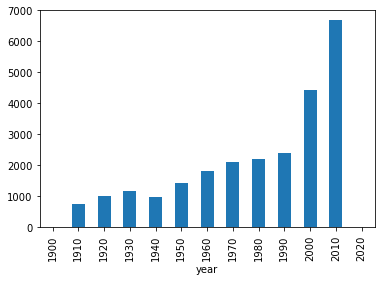

In [35]:
titles.groupby(titles['year'] // 10 * 10).size().plot(kind='bar')

<div class="alert alert-success">
    <b>QUESTION</b>: Use groupby() to plot the number of "Hamlet" films made each decade.
</div>

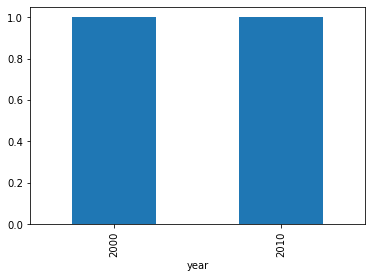

In [38]:
hamlet = titles[titles['title'] == 'Hamlet']
hamlet.groupby(hamlet['year'] // 10 * 10).size().plot(kind='bar')

<div class="alert alert-success">
    <b>QUESTION</b>: How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?
</div>

In [33]:
# %load snippets/04b - Advanced groupby operations10.py
cast1950 = cast[cast['year'] // 10 == 195]
cast1950 = cast1950[cast1950['n'] == 1]
cast1950.groupby(['year', 'type']).size()

year  type   
1950  actor      86
      actress    32
1951  actor      86
      actress    45
1952  actor      77
                 ..
1957  actress    31
1958  actor      85
      actress    41
1959  actor      94
      actress    37
Length: 20, dtype: int64

<div class="alert alert-success">
    <b>QUESTION</b>: List the 10 actors/actresses that have the most leading roles (n=1) since the 1990's.
</div>

In [40]:
# %load snippets/04b - Advanced groupby operations11.py
cast1990 = cast[cast['year'] >= 1990]
cast1990 = cast1990[cast1990.n == 1]
cast1990.groupby('name').size().nlargest(10)

name
Mohanlal              26
Nagarjuna Akkineni    21
Mammootty             19
John Cleese           16
Ed Skudder            13
Govinda               13
Stephen Chow          13
Andy Lau              12
C. Thomas Howell      12
Denis Lavant          12
dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: List, in order by year, each of the films in which Mohanlal has played more than 1 role.
</div>

In [48]:
# %load snippets/04b - Advanced groupby operations13.py
c = cast
c = c[c.name == 'Mohanlal']
g = c.groupby(['year', 'title']).size()
g[g > 1]

year  title    
1991  Abhimanyu    2
1994  Pavithram    2
2013  Lokpal       2
dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: List each of the characters that Frank Oz has portrayed at least twice.
</div>

In [53]:
# %load snippets/04b - Advanced groupby operations15.py
c = cast
c = c[c.name == 'Govinda']
g = c.groupby(['character']).size()
g[g > 1].sort_values(ascending = False)

character
Himself    3
Amar       3
Ravi       2
Raja       2
dtype: int64

## Transforms

Sometimes you don't want to aggregate the groups, but transform the values in each group. This can be achieved with `transform`:

In [54]:
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


In [55]:
df.groupby('key').transform('mean')

,data
0,5
1,10
2,15
3,5
4,10
5,15
6,5
7,10
8,15


<div class="alert alert-success">
    <b>QUESTION</b>: Add a column to the `cast` dataframe that indicates the number of roles for the film.
</div>

In [ ]:
# %load snippets/04b - Advanced groupby operations21.py


## string manipulations

Python strings have a lot of useful methods available to manipulate or check the content of the string:

In [61]:
s = 'Kohli'

In [62]:
s.startswith('K')

True

In pandas, those methods (together with some additional methods) are also available for string Series through the `.str` accessor:

In [63]:
s = pd.Series(['Kohli', 'Rohit', 'Rahul'])

In [64]:
s.str.startswith('R')

0    False
1     True
2     True
dtype: bool

For an overview of all string methods, see: http://pandas.pydata.org/pandas-docs/stable/api.html#string-handling

<div class="alert alert-success">
    <b>QUESTION</b>: We already plotted the number of 'Hamlet' films released each decade, but not all titles are exactly called 'Hamlet'. Give an overview of the titles that contain 'Hamlet':
</div>

In [69]:
# %load snippets/04b - Advanced groupby operations29.py
hamlets = titles[titles['title'].str.contains('Hamlet')]
hamlets['title'].value_counts()

Hamlet                                 2
Hamlet, Prince of Denmark              1
Dogg's Hamlet, Cahoot's Macbeth        1
Predstava 'Hamleta' u Mrdusi Donjoj    1
Hamlet, Son of a Kingpin               1
Name: title, dtype: int64

## Value counts

A useful shortcut to calculate the number of occurences of certain values is `value_counts` (this is somewhat equivalent to `df.groupby(key).size())`)

For example, what are the most occuring movie titles?

In [73]:
titles.title.value_counts().head()

Never Too Late           4
Lady Windermere's Fan    3
Surrender                3
Scrooge                  3
Shart                    3
Name: title, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Which years saw the most films released?
</div>

In [75]:
# %load snippets/04b - Advanced groupby operations34.py
t = titles
t.year.value_counts().head(3)

2015    1616
2014     972
2012     876
Name: year, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Plot the number of released films over time
</div>

In [ ]:
# %load snippets/04b - Advanced groupby operations35.py

<div class="alert alert-success">
    <b>EXERCISE</b>: Plot the number of "Hamlet" films made each decade.
</div>

In [ ]:
# %load snippets/04b - Advanced groupby operations36.py

<div class="alert alert-success">
    <b>EXERCISE</b>: What are the 11 most common character names in movie history?
</div>

In [ ]:
# %load snippets/04b - Advanced groupby operations37.py

<div class="alert alert-success">
    <b>EXERCISE</b>: Which actors or actresses appeared in the most movies in the year 2010?
</div>

In [ ]:
# %load snippets/04b - Advanced groupby operations38.py

<div class="alert alert-success">
    <b>EXERCISE</b>: Plot how many roles Brad Pitt has played in each year of his career.
</div>

In [ ]:
# %load snippets/04b - Advanced groupby operations39.py

<div class="alert alert-success">
    <b>EXERCISE</b>: What are the 10 most film titles roles that start with the word "The Life"?
</div>

In [ ]:
# %load snippets/04b - Advanced groupby operations40.py

<div class="alert alert-success">
    <b>EXERCISE</b>: How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s? And in 2000s?
</div>

In [ ]:
# %load snippets/04b - Advanced groupby operations41.py

In [ ]:
# %load snippets/04b - Advanced groupby operations42.py